# Parameters Test

The purpose of this test is to understand which parameter ranges distinguish between the regime in which mutations are not overlapping (thus easily distinguishable) and the regime in which they are overlapping (reconstruction is required).

In [1]:
import sys
sys.path.insert(1, '../code') 
from Parameters import *
from Simulator import Simulator
import matplotlib.pyplot as plt
import numpy as np

## First Test: average number of events for each duplication

Here for semplicity we set: 
- distribution of the number of events = Poisson distribution;
- distribution of the Rearrangement length = truncated uniform distribution;
- all the events (Rearrangements/Mutations) are equiprobable:

The planned simulation should reach $O(10^6)$ cells at the end of the last generation (which would be the 20th). Unfortunately, my laptop does not reach the computing power and memory required to simulate 20 generations. \
To overcome the problem, we will simulate only 5 generations ($\frac{1}{4}$ of the total). Assuming that for each duplication each cell undergoes an average number of events, we expect that the average number of events that will give the same result but in 20 generations will be $\frac{1}{4}$ of that found.

In [2]:
number_of_generations = 5

In [3]:
n_tot = 20
plots = []
stat = np.zeros((n_tot, 2))
max_stat = np.zeros((n_tot, 2))
for average_events_number in range(n_tot):
     print(f"\nNumber of events: {average_events_number}")
     simul = Simulator(chromosome_table, number_of_generations, average_events_number, cumulative_list, \
          n_events_distrib, del_len_distrib, ins_len_distrib, transl_len_distrib, dupl_len_distrib)
     simul.run_visualization(simul.parent, number_of_generations)
     ave, stdv = simul.stat_superposed_mutations()
     max_ave, max_stdv = simul.stat_max_superposed_mutations()
     stat[average_events_number, 0], stat[average_events_number, 1] = ave, stdv
     max_stat[average_events_number, 0], max_stat[average_events_number, 1] = max_ave, max_stdv
     print(f"average: {ave}, standard deviation: {stdv}")
     print(f"max average: {max_ave}, max standard deviation: {max_stdv}")


Number of events: 0
average: 0.0, standard deviation: 0.0
max average: 0.0, max standard deviation: 0.0

Number of events: 1
average: 0.35546875, standard deviation: 0.48674759144081803
max average: 1.375, max standard deviation: 0.4841229182759271

Number of events: 2
average: 0.525390625, standard deviation: 0.568835711046792
max average: 2.0, max standard deviation: 0.0

Number of events: 3
average: 0.673828125, standard deviation: 0.49711923414708503
max average: 1.84375, max standard deviation: 0.3630921887069453

Number of events: 4
average: 0.880859375, standard deviation: 0.4501137483732411
max average: 2.0, max standard deviation: 0.0

Number of events: 5
average: 0.86328125, standard deviation: 0.5124041211762816
max average: 2.03125, max standard deviation: 0.8472151069828724

Number of events: 6
average: 0.896484375, standard deviation: 0.4319145058699226
max average: 1.96875, max standard deviation: 0.17399263633843817

Number of events: 7
average: 1.1015625, standard dev

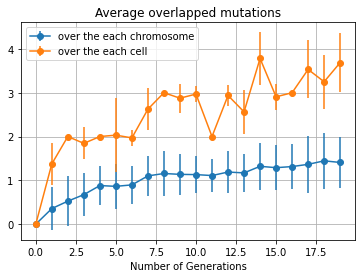

In [4]:
fig, ax = plt.subplots() 
ax.set_title("Average overlapped mutations")
ax.set_xlabel("Number of Generations")
ax.errorbar(range(n_tot), stat[:, 0], yerr=stat[:, 1], marker='o', label='over the each chromosome')
ax.errorbar(range(n_tot), max_stat[:, 0], yerr=max_stat[:, 1], marker='o', label='over the each cell')
ax.legend()
ax.grid(True)

Test with halved number of generations

In [5]:
number_of_generations = 3

In [6]:
n_tot = 10
plots = []
stat = np.zeros((n_tot, 2))
max_stat = np.zeros((n_tot, 2))
for average_events_number in range(n_tot):
     print(f"\nNumber of events: {average_events_number}")
     simul = Simulator(chromosome_table, number_of_generations, average_events_number, cumulative_list, \
     n_events_distrib, del_len_distrib, ins_len_distrib, transl_len_distrib, dupl_len_distrib, visual = True)
     plots.append(simul.chromosome_visualizator(1))
     ave, stdv = simul.stat_superposed_mutations()
     max_ave, max_stdv = simul.stat_max_superposed_mutations()
     stat[average_events_number, 0], stat[average_events_number, 1] = ave, stdv
     max_stat[average_events_number, 0], max_stat[average_events_number, 1] = max_ave, max_stdv
     print(f"average: {ave}, standard deviation: {stdv}")
     print(f"max average: {max_ave}, max standard deviation: {max_stdv}")


Number of events: 0


AttributeError: 'Simulator' object has no attribute 'chromosome_visualizator'

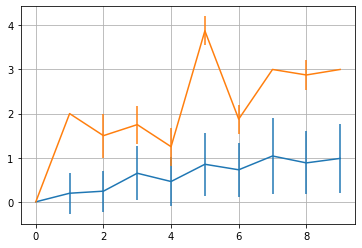

In [ ]:
plt.errorbar(range(n_tot), stat[:, 0], yerr=stat[:, 1], marker='o')
plt.errorbar(range(n_tot), max_stat[:, 0], yerr=max_stat[:, 1], marker='o')
plt.grid(True)

In [ ]:
np.sqrt(2)

1.4142135623730951